# Machine Learning Engineer Nanodegree
## Capstone Project
## Supervised Learning
## Project: Predicting the Webiste whether it is phishy or Legitimate or Suspicious

# Project Overview
* The problem is to predict whether the website is phishy or suspicious or Legitimate by using the features of the webiste like SFH,PopUPWindow,URL length etc.Each of the feature is represented by -1 or 0 or 1 which means whether the feature is phishy or suspicious or legitimate. Based on these features the result is defined as -1 or 0 or 1(Phishy,suspicious,Legitimate).The output label is of three classes as mentioned above. 

In [ ]:
#importing the data and necessary python libraries

In [264]:
#importing necessary modules
import numpy as np
import pandas as pd
from time import time
from IPython.display import display 
import seaborn as sb
import matplotlib.pyplot as pl
# Pretty display for notebooks
%matplotlib inline


# Reading the data

In [265]:
# Load the PhishingData dataset and store it in data
data = pd.read_csv("PhishingData.csv")

# display
display(data.head(n=5))

,SFH,popUpWindow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


# Feature Exploration

In [266]:
data.describe()

,SFH,popUpWindow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,0.237990,-0.258684,0.327421,-0.223208,-0.025129,0.000000,-0.053215,0.219512,0.114560,-0.113821
std,0.916389,0.679072,0.822193,0.799682,0.936262,0.806776,0.762552,0.975970,0.318608,0.954773
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [267]:
#Number of instances of different classes of output label.
print len(data[data.Result==0])
print len(data[data.Result==-1])
print len(data[data.Result==1])

103
702
548


# Preparing the data

In [268]:
#separate the Output label and input features
#store output label as result and input features as features
result=data['Result']
features=data.drop('Result',axis=1)

In [269]:
#plot for the output label classes

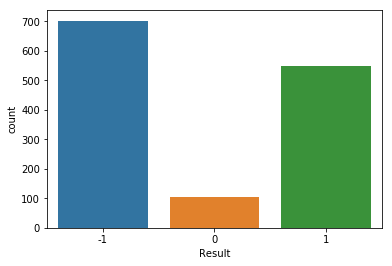

In [182]:
sb.countplot(data['Result'])

By seeing the above Graph,we can figure out that there are three classes and they are imbalanced.The category -1(phishy) is high(702 instances) followed by category 1(legitimate)(548 instances) and very little for category 0(suspicious)(103).So while evaluating we need to choose a balanced metric,otherwise we end up getting bad results.This is a multi classification problem with three classes.

In [ ]:
#Relation between input features and output label classes.

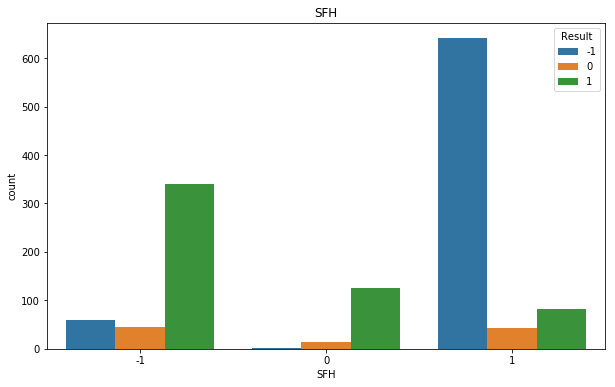

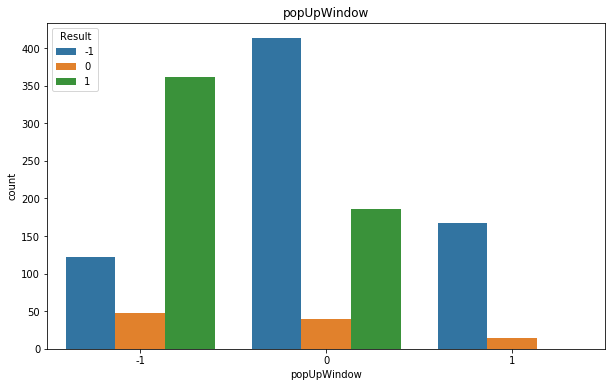

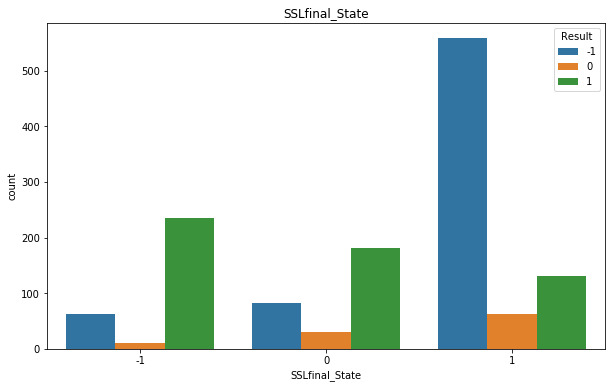

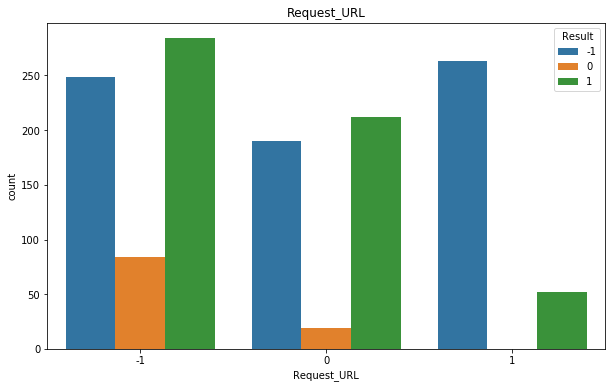

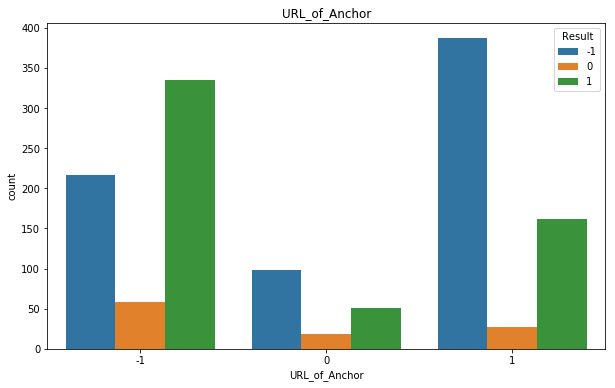

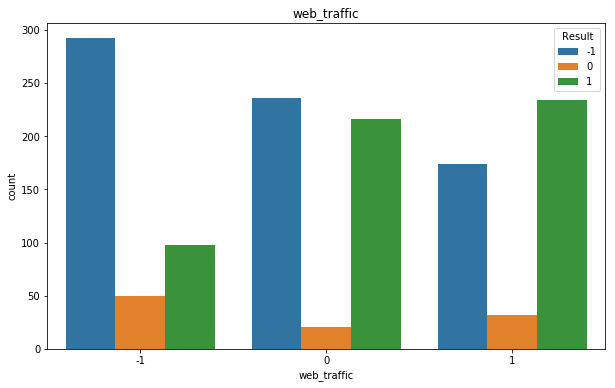

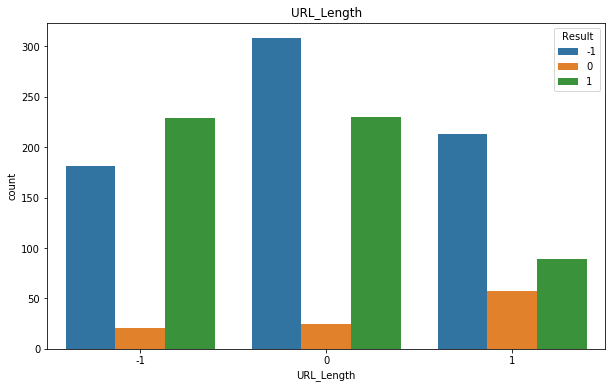

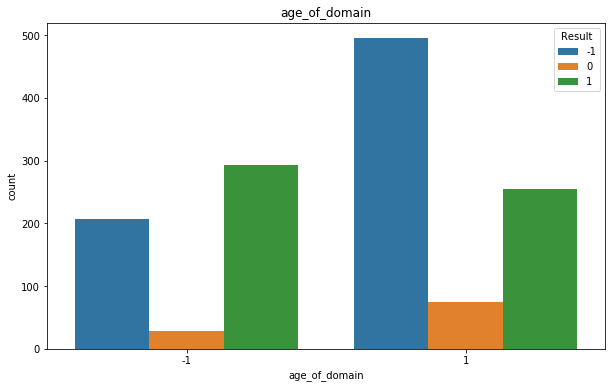

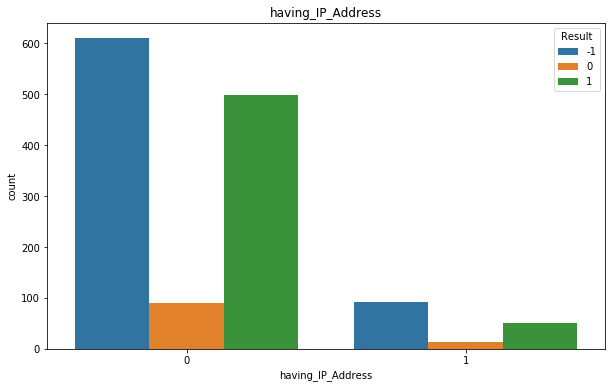

In [196]:
for i in features.columns:
    plt.figure(figsize=(10,6))
    plt.title('%s'%i)
    sb.countplot(data[i],hue=data['Result'])

The above plots shows the relation between input feature classes and the output label classes.It shows for every feature,which category has got -1 , 0 , 1 (phishy,suspicious,legitimate).Because of the presence of third class(with low number of instances),we can see that there is less chance of being suspicious.

                        SFH  popUpWindow  SSLfinal_State  Request_URL  \
SFH                1.000000     0.375943        0.368690     0.257247   
popUpWindow        0.375943     1.000000        0.218050     0.111520   
SSLfinal_State     0.368690     0.218050        1.000000     0.057239   
Request_URL        0.257247     0.111520        0.057239     1.000000   
URL_of_Anchor      0.333703     0.167760        0.088525     0.337277   
web_traffic       -0.187082    -0.140407       -0.171719    -0.045858   
URL_Length         0.151503     0.136229        0.095055     0.048431   
age_of_domain      0.163182     0.076815        0.208091     0.053348   
having_IP_Address  0.043349     0.123399        0.108000     0.013346   
Result            -0.678277    -0.509749       -0.518762    -0.271609   

                   URL_of_Anchor  web_traffic  URL_Length  age_of_domain  \
SFH                     0.333703    -0.187082    0.151503       0.163182   
popUpWindow             0.167760    -0.14040

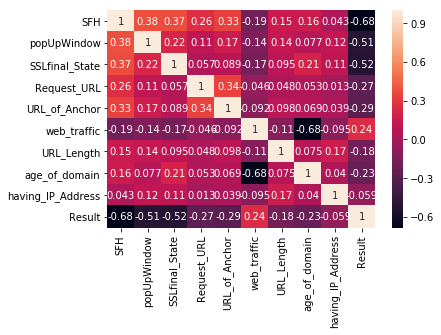

In [328]:
import seaborn
print data.corr()
seaborn.heatmap(data.corr(),annot=True)

From the above heat map we can see that there is no good correlation between any of the two features,so we cannot eliminate some features from the data. 

# Shuffle and Split Data

In [270]:
#
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'result' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    result, 
                                                    test_size = 0.2, 
                                                    random_state = 5)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1082 samples.
Testing set has 271 samples.


We can see that there are total of 1353 instances,Those instances are splitted into 1082 samples as training data and 271 samples as testing data by taking test size as 20%.It means 80% data is taken as training data and 20% as testing data.

# Evaluating Model Performance

Model Evaluation is the phase where we can know how best the model is.so choosing the best metric is very essential.Based on the data set we need to choose the best metric.There are many metrics like Accuracy score,f1_Score,mcc etc.

Here i am going to  f1-score and mcc as a metric of evaluation.The reason to choose these metrics is the classes are imbalanced,so accuracy score wont perform well so i need to consider precision and recall.
### Benchmark model
The benchmark model i am using is logistic regression,benchmark model means that it decently generalises the data,not too intelligent.

In [272]:
# Benchmark model
#import logistic regression which is used as a benchmark model
#import Evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#create logistic regression object
clf_lr = LogisticRegression(random_state=5)
#Train the model using training data 
clf_lr=clf_lr.fit(X_train,y_train)

#Test the model using testing data
predictions = clf_lr.predict(X_test)

print "f1 score is ",f1_score(y_test,predictions,average='weighted')
print "matthews correlation coefficient is ",matthews_corrcoef(y_test,predictions)

#secondary metric,we should not consider accuracy score because the classes are imbalanced.
print "Accuracy score is ",accuracy_score(y_test,predictions)


f1 score is  0.7946854076525008
matthews correlation coefficient is  0.675510372414195
Accuracy score is  0.8265682656826568


## performance of Benchmark model
From the above model(Logistic Regression which is used as a benchmark model) we can see that f1 score(0.79) and mcc(0.67).It seems like a good benchmark model which is having a decent score.We dont take Accuracy score into consideration,it is just used for comparison because the classes are imbalanced.We use this model to make comparision with the final model chosen with best f1 score.

# Supervised Learning Models
The supervised Learning moodels that i will be using is 
1)AdaBoostClassifier
2)SVM
3)GradientBoostingclassifier
We need to choose the one that gives the best score.

# Implementation - Creating a Training and Predicting Pipeline

In [273]:

def predict(learner, X_train, y_train, X_test, y_test): 
    
    results = {}
    
    learner = learner.fit(X_train,y_train)
    predictions_test = learner.predict(X_test)
    
    results['f1_score'] = f1_score(y_test,predictions_test,average='weighted')
    results['mcc_score'] = matthews_corrcoef(y_test,predictions_test)   
    results['acc_score'] = accuracy_score(y_test,predictions_test)
    
    return results

#### Test the three models

In [320]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# TODO: Initialize the three models
clf_A = AdaBoostClassifier(random_state=0)
clf_B = SVC(random_state=0)
clf_C = GradientBoostingClassifier(n_estimators=250,random_state=0)

print "AdaBoostClassifier : ",predict(clf_A,X_train, y_train, X_test, y_test)
print "svm : ",predict(clf_B,X_train, y_train, X_test, y_test)
print "GradientBoostingClassifier : ",predict(clf_D,X_train, y_train, X_test, y_test)



AdaBoostClassifier :  {'f1_score': 0.821322434179438, 'acc_score': 0.8339483394833949, 'mcc_score': 0.6927992587916685}
svm :  {'f1_score': 0.8125582239428951, 'acc_score': 0.8450184501845018, 'mcc_score': 0.7113921424929533}
GradientBoostingClassifier :  {'f1_score': 0.8963936028186082, 'acc_score': 0.8966789667896679, 'mcc_score': 0.8141502739444414}


#### Models Evaluation
From the above models we can see that the f1-score and mcc score is better for GradientBoostingClassifier with f1-score(0.89)
and mcc(0.82).For gradient boosting classifier mcc score is also good So we can take this as the final model suitable for this data.

# Improving Results

#### Choosing the Best Model
The best model is GradientBoostingClassifier,which gives f1-score of 0.89 and mcc score of 0.82.So we need to choose this model as our final model and improve the results by choosing best parameters possible.This can be done by using grid search method.

In [327]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import matthews_corrcoef

clf = GradientBoostingClassifier(n_estimators=250,random_state=0)

parameters = {'n_estimators':[100,50,250],'learning_rate':[0.1,0.5]}

scorer = make_scorer(f1_score,average='weighted')
grid_obj = GridSearchCV(clf,parameters,scoring=scorer)
grid_fit = grid_obj.fit(X_train,y_train)
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf_C.fit(X_train, y_train)).predict(X_test)
#best_predictions = best_clf.predict(X_test)
best_predictions = best_clf.predict(X_test) 

print("Unoptimized model\n------")
print("f1_score core on testing data: {:.4f}".format(f1_score(y_test, predictions,average='weighted')))
print("\nOptimized Model\n------")
print("Final f1_score on the testing data: {:.4f}".format(f1_score(y_test, best_predictions,average='weighted')))


Unoptimized model
------
f1_score core on testing data: 0.8659

Optimized Model
------
Final f1_score on the testing data: 0.8964


From the Grid search we can see that that optimised model got 0.89 compared to unoptimised model(0.86).Hence optimised model performs better than unoptimised model. 

#### parameters
The parameters that are chosen after paramter tuning 

In [326]:
print(best_clf)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)


# conclusion

So,By using the GradientBoostingClassifier,we got the best optimised model with an f1_score of 0.89. so it can be used a model to detect whether the webiste is phishy suspicious or legitimate.This model can generalize the data well. 